# IMDB MOVIE REVIEW SENTIMENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [11]:
df.nunique()

review       49582
sentiment        2
dtype: int64

In [13]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [15]:
df.duplicated().sum()

418

In [17]:
df = df.drop_duplicates()

In [19]:
# Rechecking
df.duplicated().sum()

0

In [21]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [23]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [25]:
le=LabelEncoder()
df['sentiment']= le.fit_transform(df['sentiment'])

In [27]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [29]:
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\sooraj
[nltk_data]     sb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [64]:
#pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='sentiment', ylabel='count'>

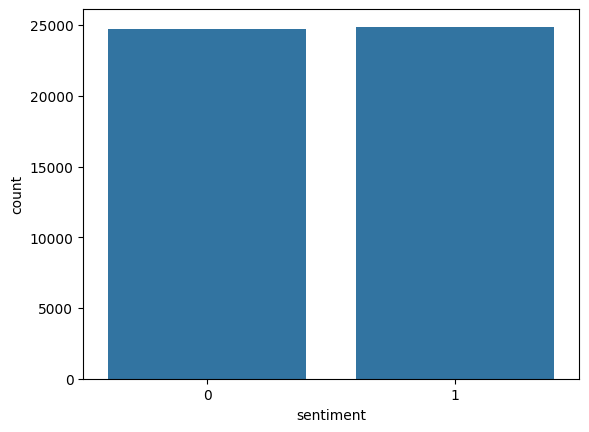

In [31]:
sns.countplot(x='sentiment',data=df)

In [33]:
#Text Preprocessing

def clean(text):

    text=str(text).lower()
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    
    text = [stemmer.stem(word) for word in text.split(' ')]

    text=" ".join(text)
    return text

In [35]:
from nltk.corpus import stopwords 
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\sooraj
[nltk_data]     sb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
stemmer = nltk.SnowballStemmer("english")

In [39]:
df['review']=df["review"].apply(clean)
df

,review,sentiment
0,one review mention watch oz episod youll hook...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job wasnt creativ orig...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,im go disagre previous comment side maltin one...,0


In [41]:
vectorizer = TfidfVectorizer(max_features=1000)

In [43]:
x = vectorizer.fit_transform(df['review']).toarray()
y = df['sentiment']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [49]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [51]:
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4939
           1       0.85      0.88      0.86      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

Accuracy: 0.860139154986387


In [109]:
import joblib

# Save vectorizer and model
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(model, 'model.pkl')

['model.pkl']

In [111]:
# Load the saved vectorizer and model
vectorizer = joblib.load('vectorizer.pkl')
model = joblib.load('model.pkl')

In [53]:
d=df.iloc[1:5,:]
d

,review,sentiment
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [55]:
list(d['review'])

['wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done',
 'thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point  risk addict thought proof woodi allen still fulli control style mani us grown lovethi id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young woma

In [57]:
new_data1=["wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done"]

In [59]:
new_dataframe=pd.DataFrame(new_data1,columns=['review'])

In [63]:
new_dataframe['review']=new_dataframe["review"].apply(clean)
X_new =vectorizer.transform(new_dataframe['review'])
prediction = model.predict(X_new)
sentiment_label = "Positive" if prediction[0] == 1 else "Negative"
print(f"Predicted Sentiment: {sentiment_label}")

Predicted Sentiment: Positive


In [91]:
new_data1=["encourag posit comment film look forward watch film bad mistak ive seen  film truli one worst  aw almost everi way edit pace storylin act soundtrack film song  lame countri tune  play less four time film look cheap nasti bore extrem rare happi see end credit film thing prevent give  harvey keitel  far best perform least seem make bit effort one keitel obsess"]

In [93]:
new_data1

['encourag posit comment film look forward watch film bad mistak ive seen  film truli one worst  aw almost everi way edit pace storylin act soundtrack film song  lame countri tune  play less four time film look cheap nasti bore extrem rare happi see end credit film thing prevent give  harvey keitel  far best perform least seem make bit effort one keitel obsess']

In [95]:
new_data=pd.DataFrame(new_data1,columns=['review'])

In [97]:
new_data

,review
0,encourag posit comment film look forward watch...


In [107]:
new_data['review']=new_data["review"].apply(clean)
X_new =vectorizer.transform(new_data['review'])
prediction = model.predict(X_new)
sentiment_label = "Positive" if prediction[0] == 1 else "Negative"
print(f"Predicted Sentiment: {sentiment_label}")

Predicted Sentiment: Negative
